In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import backtrader as bt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pyfolio as pf
import quantstats
import math
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)

C:\ProgramData\Anaconda3\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [3]:
MonthlyReturn = pd.read_excel('MonthlyAssetClassReturn.xlsx')

In [4]:
MonthlyReturn.head()

,Data Index,Broker Call Rate,CPI,T-Bills,S&P 500 Total return,Small Cap Stocks,MSCI EAFE,EEM,US 10 YR,US Corp Bond Return Index,...,International Small Cap Value (Global B/M Small Low),International Large Cap Value (Global B/M Big Low),International Small High Mom (Global mom Small High),International Large High Mom (Global mom Small High),Merrill High Yield,World Stocks,World ex USA,BuyWrite,PutWrite,Bitcoin
0,1900-01-31,NaN,0.013333,0.0025,0.016413,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-02-28,NaN,0.000000,0.0025,0.021138,NaN,NaN,NaN,0.011278,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-03-31,NaN,0.000000,0.0025,0.011084,NaN,NaN,NaN,0.009758,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1900-04-30,NaN,0.000000,0.0025,0.015894,NaN,NaN,NaN,-0.016107,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1900-05-31,NaN,0.000000,0.0025,-0.044246,NaN,NaN,NaN,0.016023,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
MonthlyReturn = MonthlyReturn.set_index('Data Index')

In [6]:
MonthlyReturn.head()

,Broker Call Rate,CPI,T-Bills,S&P 500 Total return,Small Cap Stocks,MSCI EAFE,EEM,US 10 YR,US Corp Bond Return Index,GSCI,...,International Small Cap Value (Global B/M Small Low),International Large Cap Value (Global B/M Big Low),International Small High Mom (Global mom Small High),International Large High Mom (Global mom Small High),Merrill High Yield,World Stocks,World ex USA,BuyWrite,PutWrite,Bitcoin
Data Index,,,,,,,,,,,,,,,,,,,,,
1900-01-31,NaN,0.013333,0.0025,0.016413,NaN,NaN,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-02-28,NaN,0.000000,0.0025,0.021138,NaN,NaN,NaN,0.011278,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-03-31,NaN,0.000000,0.0025,0.011084,NaN,NaN,NaN,0.009758,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-04-30,NaN,0.000000,0.0025,0.015894,NaN,NaN,NaN,-0.016107,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-05-31,NaN,0.000000,0.0025,-0.044246,NaN,NaN,NaN,0.016023,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
Monthly_NTSX = MonthlyReturn.loc[:, ['S&P 500 Total return','US 10 YR','T-Bills']]
Monthly_NTSX['NTSX'] = Monthly_NTSX['S&P 500 Total return'] * 0.9 + Monthly_NTSX['US 10 YR'] * 0.7 - Monthly_NTSX['T-Bills'] * 0.6

In [8]:
quantstats.stats.sharpe(Monthly_NTSX['NTSX'])/math.sqrt(252/12)

0.6675761762079802

In [9]:
quantstats.stats.volatility(Monthly_NTSX['NTSX'])/math.sqrt(252/12)

0.16733752384398745

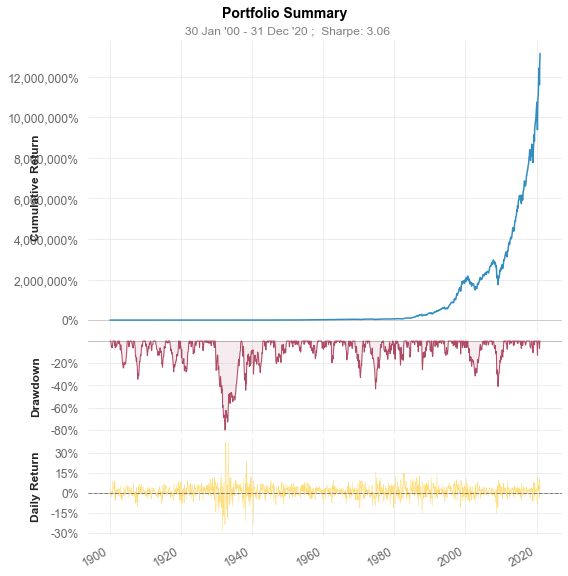

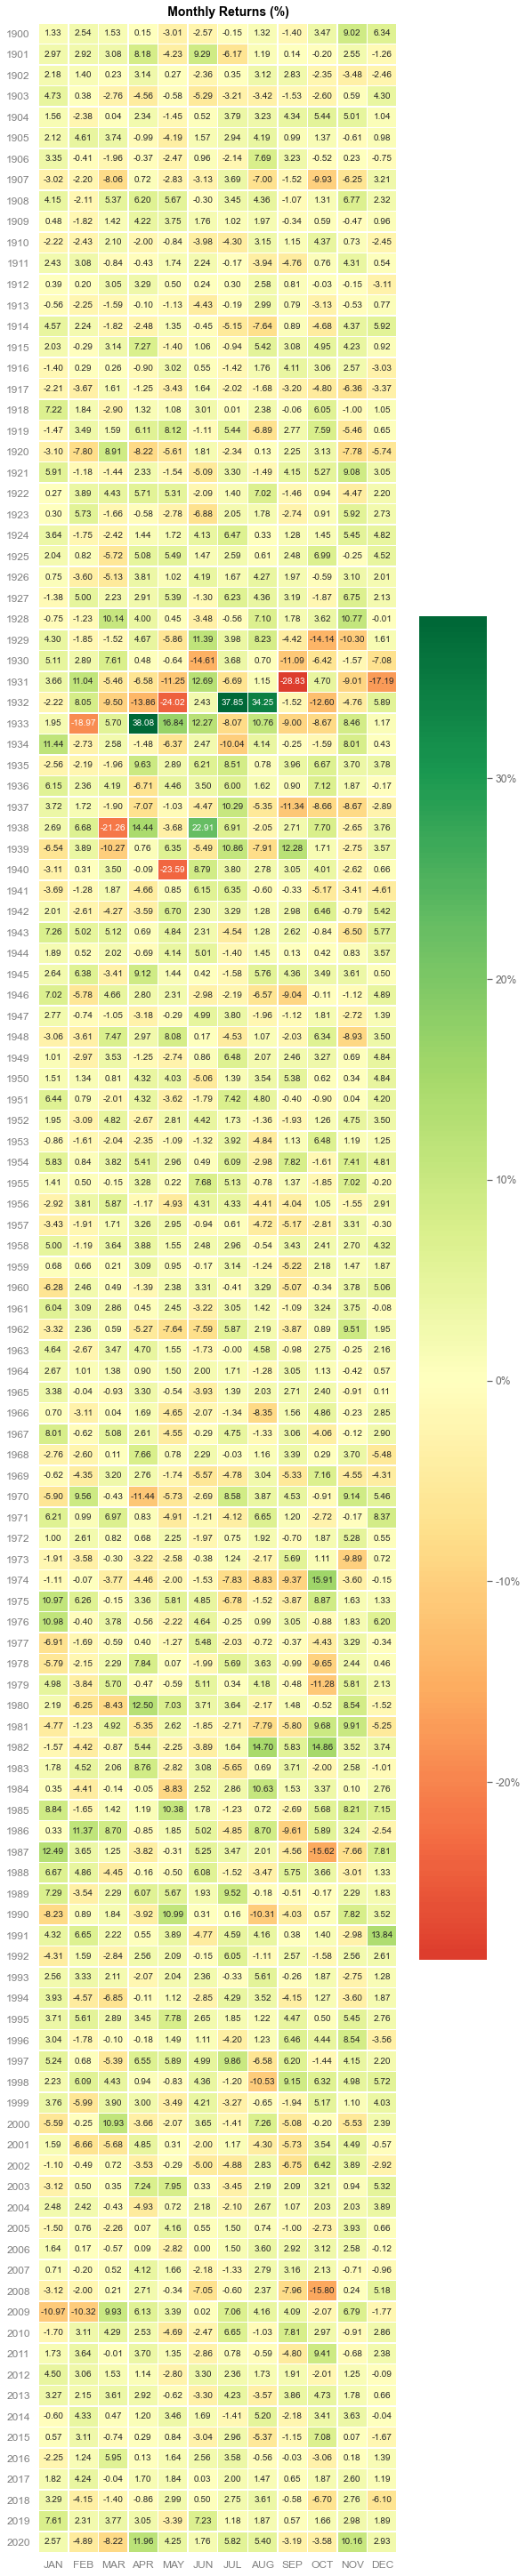

In [10]:
quantstats.reports.plots(Monthly_NTSX['NTSX'], mode='basic')

In [11]:
quantstats.reports.metrics(Monthly_NTSX['NTSX'], mode='full')

                           Strategy
-------------------------  --------------
Start Period               1900-01-31
End Period                 2020-12-31
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          13,160,750.33%
CAGR%                      10.23%
Sharpe                     3.06
Sortino                    4.94
Max Drawdown               -80.12%
Longest DD Days            2680
Volatility (ann.)          76.68%
Calmar                     0.13
Skew                       0.3
Kurtosis                   8.62

Expected Daily %           0.82%
Expected Monthly %         0.82%
Expected Yearly %          10.23%
Kelly Criterion            25.45%
Risk of Ruin               0.0%
Daily Value-at-Risk        -7.01%
Expected Shortfall (cVaR)  -7.01%

Payoff Ratio               1.1
Profit Factor              1.72
Common Sense Ratio         2.04
CPC Index                  1.15
Tail Ratio                 1.19
Outlier Win Ratio          3.31
Outlier Loss Rat

In [14]:
quantstats.reports.html(Monthly_NTSX['NTSX'], output = 'Report_AssetAllocation_NTSX.html', title='AssetAllocation_NTSX')